In [21]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import csvTolist, skater_season_stats


In [23]:
player_ids = csvTolist('playerIds20232024.csv')
stats = skater_season_stats('realtime', player_ids[0], 20232024)
stats

{'data': [{'blockedShots': 22,
   'blockedShotsPer60': 3.72,
   'emptyNetAssists': 0,
   'emptyNetGoals': 0,
   'emptyNetPoints': 0,
   'firstGoals': 0,
   'gamesPlayed': 32,
   'giveaways': 10,
   'giveawaysPer60': 1.69,
   'hits': 35,
   'hitsPer60': 5.92,
   'lastName': 'Wahlstrom',
   'missedShotCrossbar': 2,
   'missedShotGoalpost': 2,
   'missedShotOverNet': 1,
   'missedShotShort': 0,
   'missedShotWideOfNet': 8,
   'missedShots': 13,
   'otGoals': 0,
   'playerId': 8480789,
   'positionCode': 'R',
   'seasonId': 20232024,
   'shootsCatches': 'R',
   'shotAttemptsBlocked': 28,
   'skaterFullName': 'Oliver Wahlstrom',
   'takeaways': 10,
   'takeawaysPer60': 1.69,
   'teamAbbrevs': 'NYI',
   'timeOnIcePerGame': 664.21}],
 'total': 1}

In [60]:
all_player_stats = []
season_id = 20232024
stat = 'realtime'

for id in player_ids:
   stats = skater_season_stats(stat, id, season_id)
   try:
      all_player_stats.append(stats.get('data')[0])
   except:
      pass
print(len(all_player_stats))

547


In [93]:
df = pd.DataFrame(all_player_stats)
#df.to_csv('player_list.csv')
df = df.drop(labels='seasonId', axis= 1)
df.set_index('playerId')

,assists,evGoals,evPoints,faceoffWinPct,gameWinningGoals,gamesPlayed,goals,lastName,otGoals,penaltyMinutes,...,ppGoals,ppPoints,shGoals,shPoints,shootingPct,shootsCatches,shots,skaterFullName,teamAbbrevs,timeOnIcePerGame
playerId,,,,,,,,,,,,,,,,,,,,,
8480789,4,1,4,0.41666,0,32,2,Wahlstrom,0,8,...,1,2,0,0,0.04878,R,41,Oliver Wahlstrom,NYI,664.2187
8480796,14,5,18,NaN,0,70,5,Fehervary,0,26,...,0,0,0,1,0.07246,L,69,Martin Fehervary,WSH,1185.1142
8480797,28,20,43,0.37500,2,82,22,Farabee,1,37,...,2,7,0,0,0.12087,L,182,Joel Farabee,PHI,971.1829
8480798,36,12,35,0.46350,3,75,18,Kurashev,1,23,...,6,19,0,0,0.14062,L,128,Philipp Kurashev,CHI,1141.1066
8480800,85,12,59,NaN,2,95,17,Hughes,1,44,...,5,43,0,0,0.07727,L,220,Quinn Hughes,VAN,1478.9473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8474590,43,5,32,NaN,5,86,11,Carlson,0,42,...,6,22,0,0,0.05789,R,190,John Carlson,WSH,1562.7093
8474600,64,14,53,NaN,5,88,24,Josi,2,47,...,10,34,0,1,0.08540,L,281,Roman Josi,NSH,1482.3522
8482803,7,2,7,NaN,0,26,2,Zellweger,0,4,...,0,2,0,0,0.05882,L,34,Olen Zellweger,ANA,1157.0769


In [91]:
df.corr(numeric_only=True)

,assists,evGoals,evPoints,faceoffWinPct,gameWinningGoals,gamesPlayed,goals,otGoals,penaltyMinutes,playerId,plusMinus,points,pointsPerGame,ppGoals,ppPoints,shGoals,shPoints,shootingPct,shots,timeOnIcePerGame
assists,1.000000,0.688164,0.918466,0.081498,0.645764,0.655285,0.724727,0.512959,0.280010,-0.251712,0.339578,0.956196,0.868547,0.661434,0.897416,0.213731,0.281844,0.222062,0.834998,0.632907
evGoals,0.688164,1.000000,0.890981,0.043590,0.812749,0.610892,0.968030,0.543448,0.278897,-0.166943,0.254660,0.857395,0.785238,0.718313,0.692152,0.290380,0.255544,0.522078,0.872035,0.317572
evPoints,0.918466,0.890981,1.000000,0.075624,0.758612,0.741382,0.886639,0.547191,0.335702,-0.248649,0.368044,0.972123,0.872069,0.706404,0.801343,0.277605,0.293143,0.372927,0.921968,0.546071
faceoffWinPct,0.081498,0.043590,0.075624,1.000000,0.046298,0.174666,0.063479,0.042550,0.146277,-0.158490,0.040467,0.078405,0.012261,0.082503,0.065215,0.040717,0.088567,0.025799,0.057484,0.030895
gameWinningGoals,0.645764,0.812749,0.758612,0.046298,1.000000,0.489023,0.842337,0.652707,0.206589,-0.177230,0.274091,0.776508,0.715560,0.732815,0.699902,0.299709,0.292878,0.424456,0.744004,0.328111
gamesPlayed,0.655285,0.610892,0.741382,0.174666,0.489023,1.000000,0.589303,0.319891,0.530943,-0.319965,0.199963,0.675182,0.474314,0.412166,0.460330,0.286503,0.356331,0.196687,0.747002,0.494445
goals,0.724727,0.968030,0.886639,0.063479,0.842337,0.589303,1.000000,0.586011,0.263067,-0.190037,0.248560,0.894681,0.826510,0.864356,0.788359,0.351615,0.313451,0.519960,0.888358,0.355443
otGoals,0.512959,0.543448,0.547191,0.042550,0.652707,0.319891,0.586011,1.000000,0.115453,-0.106467,0.131521,0.581513,0.550609,0.556178,0.562373,0.199601,0.190843,0.217516,0.568511,0.352269
penaltyMinutes,0.280010,0.278897,0.335702,0.146277,0.206589,0.530943,0.263067,0.115453,1.000000,-0.260540,0.087612,0.293292,0.166767,0.161758,0.173503,0.178819,0.186005,0.046717,0.381233,0.206600
playerId,-0.251712,-0.166943,-0.248649,-0.158490,-0.177230,-0.319965,-0.190037,-0.106467,-0.260540,1.000000,-0.096761,-0.243921,-0.180862,-0.182973,-0.189586,-0.150607,-0.200966,-0.004471,-0.268944,-0.245799


<Axes: >

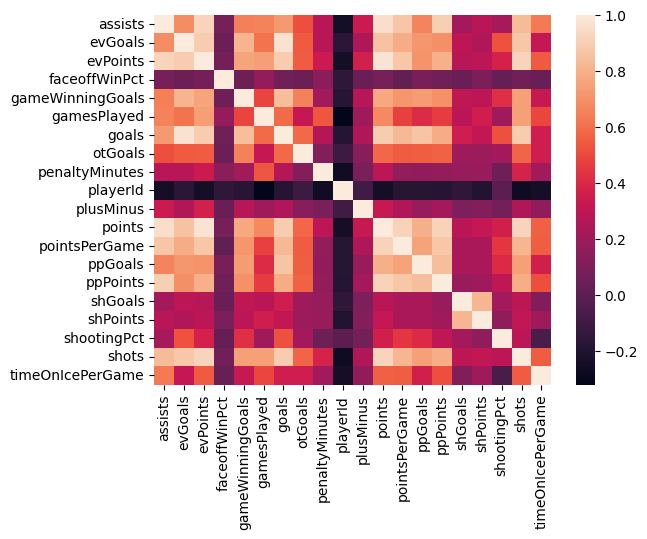

In [92]:
sns.heatmap(df.corr(numeric_only= True))

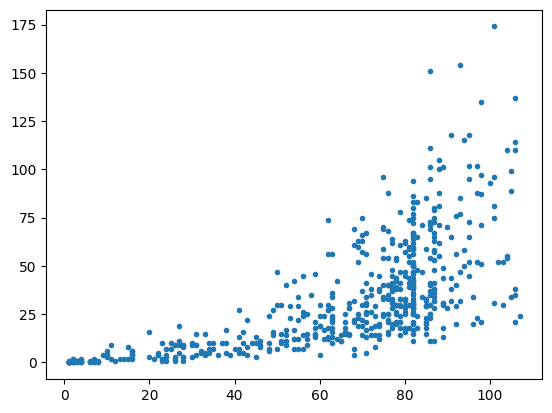

In [85]:
plt.plot(df['gamesPlayed'], df['points'], '.')
for x,y in zip(df['gamesPlayed'], df['points']):
    label = df.get_index('playerId')

In [47]:
stat_dict = player.get('data')[0]

In [49]:
stat_dict.keys()

dict_keys(['assists', 'evGoals', 'evPoints', 'faceoffWinPct', 'gameWinningGoals', 'gamesPlayed', 'goals', 'lastName', 'otGoals', 'penaltyMinutes', 'playerId', 'plusMinus', 'points', 'pointsPerGame', 'positionCode', 'ppGoals', 'ppPoints', 'seasonId', 'shGoals', 'shPoints', 'shootingPct', 'shootsCatches', 'shots', 'skaterFullName', 'teamAbbrevs', 'timeOnIcePerGame'])

In [33]:
list(all_player_ids)[0]

8480789

In [17]:
Response = requests.get(player_url(all_player_ids[0], 20232024))

In [2]:
stat_types = ['summary', 'goalsForAgainst', 'realtime', 'penalties', 'shottype']
str(stat_types)

"['summary', 'goalsForAgainst', 'realtime', 'penalties', 'shottype']"